# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
 

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
cities_info = []

weather_df = pd.DataFrame(columns=['city_name', 'country_code', 'latitude', 'longitude'])

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    cityName = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    countryCode = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if cityName not in cities:
        cities.append(cityName)
        # Append City name, Country code, latitude, longitude
        cities_info.append((cityName, countryCode, round(lat_lng[0], 5), round(lat_lng[1], 5)))

# Create a data frame from the list of cities_info
cities_info_df = pd.DataFrame(cities_info)

# Rename the column names
cities_info_df = cities_info_df.rename(columns={0: "city_name",
                                                1: "country_code",
                                                2: "latitude",
                                                3: "longitude"})

# Check to see how many cities are randomly generated
len(cities_info_df)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Define the url for the weather search
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

rows_to_drop = []
cities_url = []
cities_weather = []

# Retrieve the values of tempature, humidity, cloudiness, wind_speed
for row in range(0, len(cities_info_df)):
    try:
        lat = cities_info_df.loc[row]['latitude']
        lng = cities_info_df.loc[row]['longitude']
        query_url = base_url + 'units=imperial&lat='+ str(lat) + \
        '&lon='+ str(lng) +'&appid=' + api_key
        
        response = requests.get(query_url)
        result=response.json()
        #print(result)
        query_url = base_url + 'units=imperial&lat='+ str(lat) + \
        '&lon='+ str(lng) +'&appid=XXXXXXXXXXXXX'
        cities_url.append(query_url)
          
        city = cities_info_df.loc[row]['city_name']
        code = cities_info_df.loc[row]['country_code']
        temp = float(result['main']['temp'])
        humidity = result['main']['humidity']
        clouds = result['clouds']['all']
        speed = result['wind']['speed']

        cities_weather.append((city, code, temp, humidity, clouds, speed))
    except KeyError:
        rows_to_drop.append(row)

# Define the column names
column_names = ['city_name', 'country_code', 'temp', 'humidity', 'cloudiness', 'wind_speed']

# Create a data frame from a list of cities_weather with meaningful column names
cities_weather_df = pd.DataFrame(cities_weather, columns=column_names)

# Merge two data frame with same column names of city_name and country_code
weather_df = pd.merge(cities_info_df, cities_weather_df, on=["city_name", "country_code"])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Export the city data into a .csv
with open("output_data/cities_url.csv","w") as f:
    wr = csv.writer(f,delimiter="\n")
    wr.writerow(cities_url)
    
weather_df.to_csv(output_data_file, index=False)
weather_df.head()

,city_name,country_code,latitude,longitude,temp,humidity,cloudiness,wind_speed
0,punta arenas,cl,-84.83948,-111.73724,-36.82,85,50,8.97
1,edmond,us,35.70638,-97.30680,86.74,62,1,9.17
2,tasiilaq,gl,74.83477,-39.97976,2.96,96,100,9.75
3,hobart,au,-78.01475,150.95578,-41.68,95,100,18.32
4,luderitz,na,-32.73477,5.76531,56.78,57,93,13.04


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

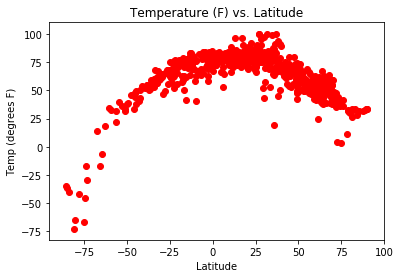

In [5]:
# Temperature (F) vs. Latitude
#X-axis: Latitude
#Y-axis: Temperature
x_axis = weather_df['latitude']
y_axis = weather_df['temp']

# Define the ranges for x-axis and y-axis
x_min=x_axis.min()-10
x_max=x_axis.max()+10

y_min=y_axis.min()-10
y_max=y_axis.max()+10

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

# Define the labels
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temp (degrees F)")

# Plot sctter diagram and save to .png
plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.savefig('output_data/Temperature_Latitude.png')
plt.show()

#### Latitude vs. Humidity Plot

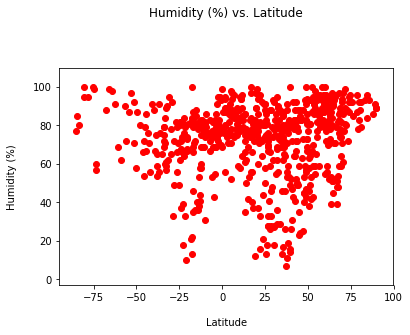

In [6]:
##Humidity (%) vs. Latitude
#X-axis: Latitude
#Y-axis: Humidity (%)
x_axis = weather_df['latitude']
y_axis = weather_df['humidity']

# Define the ranges for x-axis and y-axis
x_min=x_axis.min()-10
x_max=x_axis.max()+10

y_min=y_axis.min()-10
y_max=y_axis.max()+10

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

# Define the labels
plt.title("Humidity (%) vs. Latitude\n\n\n")
plt.xlabel("\nLatitude")
plt.ylabel("Humidity (%)\n")

# Plot sctter diagram and save to .png
plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.savefig('output_data/Humidity_Latitude.png')
plt.show()

#### Latitude vs. Cloudiness Plot

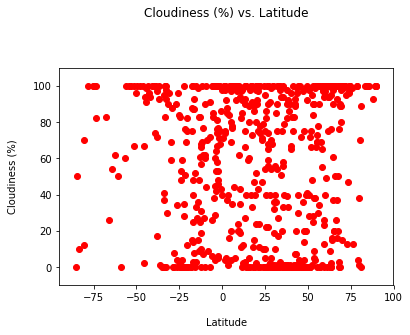

In [7]:
#Cloudiness (%) vs. Latitude
#X-axis: Latitude
#Y-axis: Cloudiness (%)
x_axis = weather_df['latitude']
y_axis = weather_df['cloudiness']

x_min=x_axis.min()-10
x_max=x_axis.max()+10

y_min=y_axis.min()-10
y_max=y_axis.max()+10

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

# Define the labels
plt.title("Cloudiness (%) vs. Latitude\n\n\n")
plt.xlabel("\nLatitude")
plt.ylabel("Cloudiness (%)\n")

# Plot sctter diagram and save to .png
plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.savefig('output_data/Cloudiness_Latitude.png')
plt.show()

#### Latitude vs. Wind Speed Plot

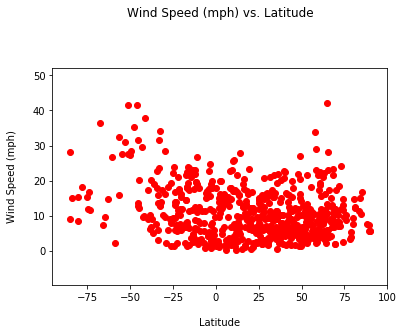

In [8]:
#Wind Speed (mph) vs. Latitude
#X-axis: Latitude
#Y-axis: Wind Speed (mph)
x_axis = weather_df['latitude']
y_axis = weather_df['wind_speed']

x_min=x_axis.min()-10
x_max=x_axis.max()+10

y_min=y_axis.min()-10
y_max=y_axis.max()+10

plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

# Define the labels
plt.title("Wind Speed (mph) vs. Latitude\n\n\n")
plt.xlabel("\nLatitude")
plt.ylabel("Wind Speed (mph)\n")

# Plot sctter diagram and save to .png
plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.savefig('output_data/WindSpeed_Latitude.png')
plt.show()